In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
df = pd.read_csv('/content/drive/MyDrive/face_emotion/Dataset/fer2013plusnew_3class.csv')
df.head()

,emotion,pixels,Usage
0,2,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,Training
1,2,123 125 124 142 209 226 234 236 231 232 235 22...,Training
2,2,236 230 225 226 228 209 199 193 196 211 199 19...,Training
3,2,255 82 0 3 0 0 0 0 0 0 3 0 16 17 3 60 29 0 1 2...,Training
4,2,206 208 209 212 214 216 216 219 221 222 222 22...,Training


In [4]:
df['emotion'].value_counts()

0    13817
1    12905
2     8763
Name: emotion, dtype: int64

In [5]:
label_to_text = {0:'positive', 1:'neutral', 2:'negative'}  #edit

In [6]:
img_array = df['pixels'].apply(lambda x: np.array(x.split(" ")).reshape(48,48,1).astype('float32'))
img_array = np.stack(img_array, axis=0)
labels = df.emotion.values

In [7]:
img_array.shape

(35485, 48, 48, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size= .2, random_state=42, stratify=labels)
#X_train, X_temp, y_train, y_temp = train_test_split(img_array, labels, test_size=0.4, random_state=42, stratify=labels)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [9]:
#X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28388, 48, 48, 1), (28388,), (7097, 48, 48, 1), (7097,))

In [10]:
X_train = X_train/255
#X_val = X_test/255
X_test = X_test/255

In [11]:
batch_size = 32
num_classes = 3

basemodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization

    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [17]:
"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

num_classes = 3

basemodel = Sequential()

# 1st convolution layer
basemodel.add(Conv2D(64, (5, 5), activation="relu", input_shape=(48, 48, 1)))
basemodel.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

# 2nd convolution layer
basemodel.add(Conv2D(64, (3, 3), activation="relu"))
basemodel.add(Conv2D(64, (3, 3), activation="relu"))
basemodel.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd convolution layer
basemodel.add(Conv2D(128, (3, 3), activation="relu"))
basemodel.add(Conv2D(128, (3, 3), activation="relu"))
basemodel.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

basemodel.add(Flatten())

# fully connected neural networks
basemodel.add(Dense(512, activation="relu"))
basemodel.add(Dropout(0.5))
basemodel.add(Dense(256, activation="relu"))
basemodel.add(Dropout(0.5))

basemodel.add(Dense(num_classes, activation="softmax"))
"""

'\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D\nfrom tensorflow.keras.layers import Flatten, Dense, Dropout\n\nnum_classes = 3\n\nbasemodel = Sequential()\n\n# 1st convolution layer\nbasemodel.add(Conv2D(64, (5, 5), activation="relu", input_shape=(48, 48, 1)))\nbasemodel.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))\n\n# 2nd convolution layer\nbasemodel.add(Conv2D(64, (3, 3), activation="relu"))\nbasemodel.add(Conv2D(64, (3, 3), activation="relu"))\nbasemodel.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))\n\n# 3rd convolution layer\nbasemodel.add(Conv2D(128, (3, 3), activation="relu"))\nbasemodel.add(Conv2D(128, (3, 3), activation="relu"))\nbasemodel.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))\n\nbasemodel.add(Flatten())\n\n# fully connected neural networks\nbasemodel.add(Dense(512, activation="relu"))\nbasemodel.add(Dropout(0.5))\nbasemodel.add(Dense(256, 

In [12]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 256)         0

In [13]:
initial_learning_rate = 0.0001  # You can adjust this value
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=initial_learning_rate)
optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
basemodel.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
def lr_schedule(epoch):
    if epoch < 10:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.1

In [15]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor='val_accuracy',
                                        verbose=1,
                                        save_freq='epoch',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        mode='max'),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.LearningRateScheduler(lr_schedule)
    #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=10,
    #                              verbose=1,factor=0.2, min_lr=0.000001)
]

In [16]:
#history = basemodel.fit(train_generator,
#                        epochs=100,
#                        validation_data=val_generator,
#                        callbacks=call_back)

history = basemodel.fit(X_train, y_train,
                        epochs=100,
                        batch_size=batch_size,
                        validation_split=.2,
                        callbacks=call_back)

Epoch 1/100
710/710 [==============================] - ETA: 0s - loss: 1.0733 - accuracy: 0.4134
Epoch 1: val_accuracy improved from -inf to 0.46495, saving model to checkpoint/best_model.h5
710/710 [==============================] - 19s 10ms/step - loss: 1.0733 - accuracy: 0.4134 - val_loss: 1.0296 - val_accuracy: 0.4650 - lr: 1.0000e-04
Epoch 2/100
  8/710 [..............................] - ETA: 5s - loss: 1.0279 - accuracy: 0.4727

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


709/710 [============================>.] - ETA: 0s - loss: 0.9872 - accuracy: 0.5278
Epoch 2: val_accuracy improved from 0.46495 to 0.58929, saving model to checkpoint/best_model.h5
710/710 [==============================] - 6s 8ms/step - loss: 0.9871 - accuracy: 0.5277 - val_loss: 0.9106 - val_accuracy: 0.5893 - lr: 1.0000e-04
Epoch 3/100
705/710 [============================>.] - ETA: 0s - loss: 0.8866 - accuracy: 0.5980
Epoch 3: val_accuracy improved from 0.58929 to 0.62962, saving model to checkpoint/best_model.h5
710/710 [==============================] - 6s 8ms/step - loss: 0.8866 - accuracy: 0.5979 - val_loss: 0.8156 - val_accuracy: 0.6296 - lr: 1.0000e-04
Epoch 4/100
709/710 [============================>.] - ETA: 0s - loss: 0.8078 - accuracy: 0.6370
Epoch 4: val_accuracy improved from 0.62962 to 0.65393, saving model to checkpoint/best_model.h5
710/710 [==============================] - 6s 8ms/step - loss: 0.8078 - accuracy: 0.6370 - val_loss: 0.7661 - val_accuracy: 0.6539 - l

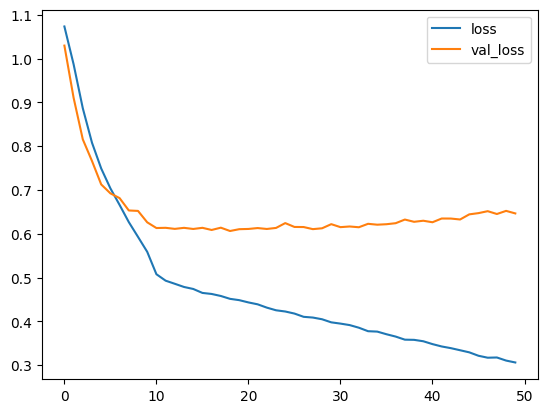

In [17]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

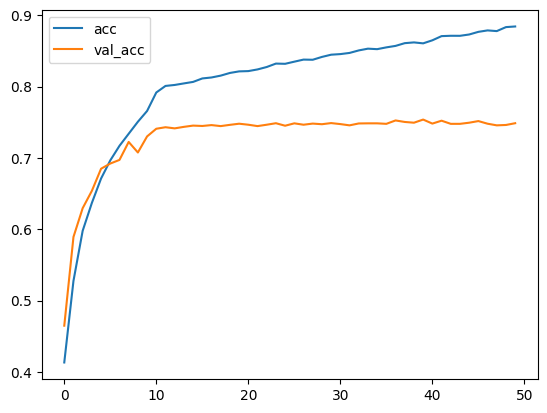

In [18]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

222/222 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

    positive     0.8289    0.8418    0.8353      2763
     neutral     0.7233    0.8245    0.7706      2581
    negative     0.7109    0.5471    0.6183      1753

    accuracy                         0.7627      7097
   macro avg     0.7544    0.7378    0.7414      7097
weighted avg     0.7614    0.7627    0.7582      7097

Confusion matrix, without normalization
[[2326  281  156]
 [ 219 2128  234]
 [ 261  533  959]]


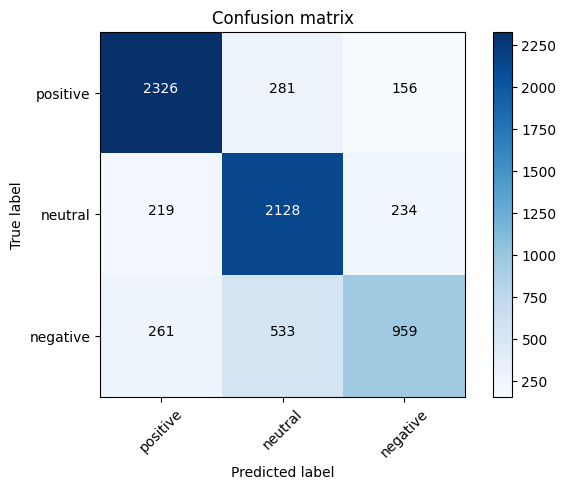

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


#label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral', 7:'contempt'}  #original
#target_names=['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral', 'contempt']
label_to_text = {0:'positive', 1:'neutral', 2:'negative'}
target_names=['positive', 'neutral', 'negative']

p_test = basemodel.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
cr = classification_report(y_test, p_test, target_names=target_names, digits=4)
print(cr)
plot_confusion_matrix(cm, list(label_to_text.values()))

In [20]:
checkpoint_path

'checkpoint/best_model.h5'

actual label is positive
1/1 [==============================] - 0s 19ms/step
predicted label is positive


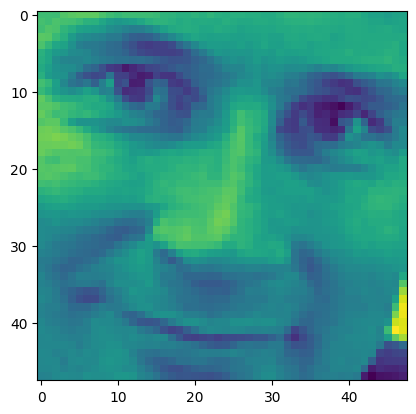

In [21]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time

for k in range(40):
        print(f'actual label is {label_to_text[y_test[k]]}')
        predicted_class = final_model.predict(tf.expand_dims(X_test[k],0)).argmax()
        print(f'predicted label is {label_to_text[predicted_class]}')
        plt.imshow(X_test[k].reshape((48,48)))
        plt.show()
        time.sleep(3)
        clear_output(wait=True)